In [24]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as  plt

In [41]:
df = pd.read_csv("../data/csv_files/at200.csv")
df.size

2306744

In [42]:
del(df["Level: Elevation (m)"])

In [43]:
df = df.dropna()


In [44]:
# the datetime is converted to timestamp in seconds
df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)
df.size

822927

In [45]:
unique_stations = df["station_id"].unique()
station_index = {}
for index,station in enumerate(unique_stations):
    station_index[station] = index
station_index

{'FPZ_04A': 0,
 'FPZ_06A': 1,
 'FEX_004': 2,
 'FSB_078': 3,
 'FSB_130D': 4,
 'FSB_079': 5,
 'FSB_097D': 6,
 'FSB_095DR': 7}

In [8]:
first_df = df[df["station_id"]=="FPZ_04A"]
first_df.size

29883

In [9]:
# Downsample the data: for instance, taking every 10th point
df_downsampled = first_df.iloc[::10, :]
df_downsampled.size

3003

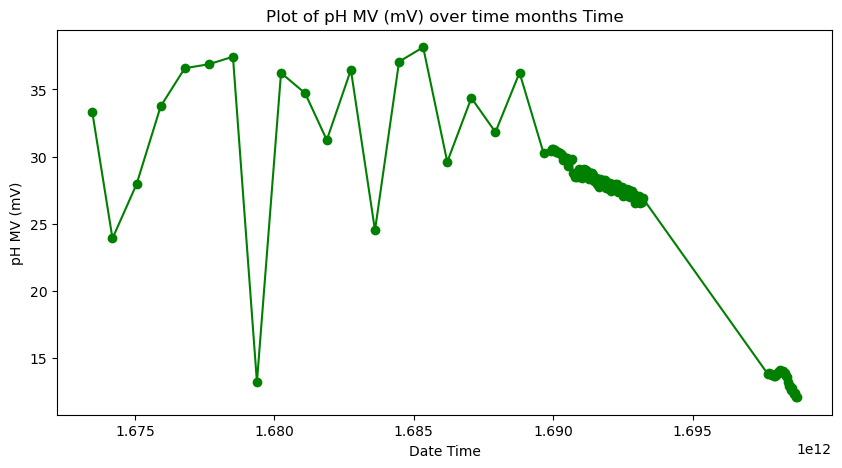

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df_downsampled["Date Time"], df_downsampled["pH MV (mV)"], marker='o', linestyle='-', color="green")
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over time months Time')
plt.show()

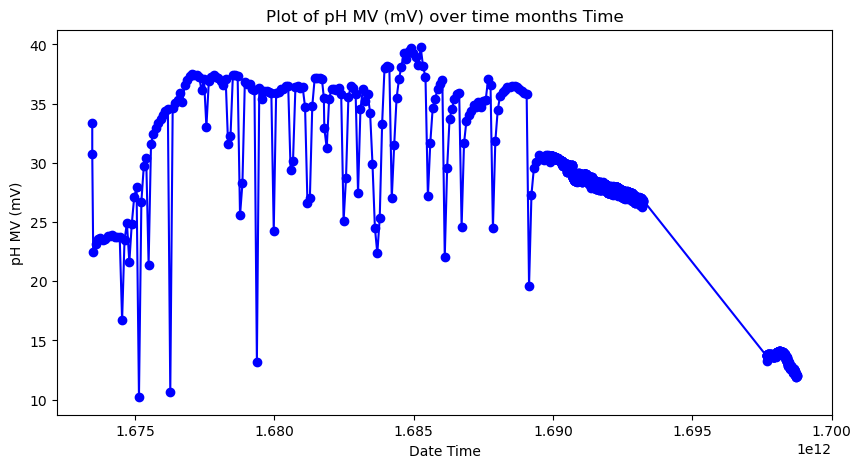

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(first_df["Date Time"], first_df["pH MV (mV)"], marker='o', linestyle='-', color="blue")
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over time months Time')
plt.show()